In [1]:
#Dependencies
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import os

In [2]:
##Sets Pandas to truncate dataframes
pd.set_option("display.max_rows", 10)

In [3]:
##Sets Pandas to not truncate dataframes
pd.set_option("display.max_rows", None, "display.max_columns", None)

In [4]:
#Input Paths
colordata = 'dataformodel/colorvisibility.csv'
cleaneddata = 'Output/deepcleanedmini.csv'

In [6]:
#Read In CSV
color_df = pd.read_csv(colordata)
color_df

,Color,Visibility,Tickets
0,Black,-5,98291
1,Brown,-4,15744
2,Burgundy,-3,1161
3,Blue,-2,9836
4,Red,5,19419
5,Green,-1,6524
6,Gold,3,2443
7,Gray,4,77618
8,Silver,4,11291
9,Purple,3,427


In [7]:
from sklearn.datasets import make_blobs

X, y = make_blobs(centers=2, random_state=42)

print(f"Labels: {y[:10]}")
print(f"Data: {X[:10]}")

Labels: [0 1 0 1 1 0 1 1 0 0]
Data: [[-2.98837186  8.82862715]
 [ 5.72293008  3.02697174]
 [-3.05358035  9.12520872]
 [ 5.461939    3.86996267]
 [ 4.86733877  3.28031244]
 [-2.14780202 10.55232269]
 [ 4.91656964  2.80035293]
 [ 3.08921541  2.04173266]
 [-2.90130578  7.55077118]
 [-3.34841515  8.70507375]]


In [17]:
#0 = less than 10,000 tickets, 1 = More than 10,000 tickets
Labels = [1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0]

In [23]:
X = color_df["Visibility"].values.reshape(-1, 1)
y = color_df["Tickets"].values.reshape(-1, 1)

In [15]:
#X = [1, 2, 3, 4, 9, 7, 8, 7, 8, 3, 8.5, 7, 5, 7.5, 2.5]

In [16]:
#y = [98291, 15744, 1161, 9836, 19419, 6524, 2443, 77618, 11291, 427, 2, 112729, 3204, 334, 447]

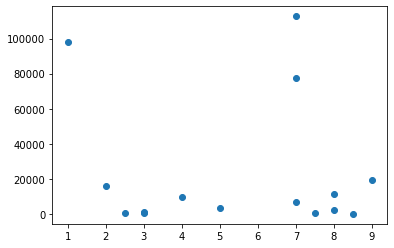

In [24]:
# Visualizing both classes
plt.scatter(X, y)

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [26]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier

LogisticRegression()

In [27]:
classifier.fit(X_train, y_train)

C:\Users\Ly Li\.conda\envs\PythonAdv\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Ly Li\.conda\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [28]:
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.36363636363636365
Testing Data Score: 0.0


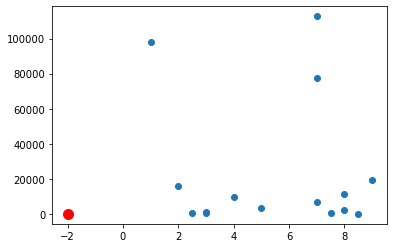

In [30]:
# Generate a new data point (the red circle)
import numpy as np
new_data = np.array([[-2, 6]])
plt.scatter(X, y)
plt.scatter(new_data[0, 0], new_data[0, 1], c="r", marker="o", s=100)

In [31]:
# Predict the class (purple or yellow) of the new data point
predictions = classifier.predict(new_data)
print("Classes are either 0 (purple) or 1 (yellow)")
print(f"The new point was classified as: {predictions}")

ValueError: X has 2 features per sample; expecting 1